In [1]:
import numpy as np
import pandas as pd

In [2]:
df1 = pd.read_csv('DrDoS_LDAP_new.csv')

C:\Users\User\AppData\Local\Temp\ipykernel_676\3717026788.py:1: DtypeWarning: Columns (80) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('DrDoS_LDAP_new.csv')


In [3]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df1[' Label']= label_encoder.fit_transform(df1[' Label'])
df1[' Label'].unique()

array([1, 0])

In [4]:
df1.drop('SimillarHTTP', axis=1, inplace=True)
df1.drop(' Fwd Packet Length Max', axis=1, inplace=True)
df1.drop(' Fwd Packet Length Min', axis=1, inplace=True)
df1.drop('Bwd Packet Length Max', axis=1, inplace=True)
df1.drop(' Bwd Packet Length Min', axis=1, inplace=True)
df1.drop(' Flow IAT Max', axis=1, inplace=True)
df1.drop(' Flow IAT Min', axis=1, inplace=True)
df1.drop(' Fwd IAT Max', axis=1, inplace=True)
df1.drop(' Fwd IAT Min', axis=1, inplace=True)
df1.drop(' Bwd IAT Max', axis=1, inplace=True)
df1.drop(' Bwd IAT Min', axis=1, inplace=True)
df1.drop(' Idle Max', axis=1, inplace=True)
df1.drop(' Idle Min', axis=1, inplace=True)
df1.drop(' Active Max', axis=1, inplace=True)
df1.drop(' Active Min', axis=1, inplace=True)

In [5]:
l = []
for col in df1:
    
    try:
        if sum(df1[col]) == 0:
            l.append(col)
    except:
        print(col)

In [6]:
df1.drop(l, axis=1, inplace=True)

In [7]:
df1.replace([np.inf, -np.inf], np.nan, inplace=True)
df1.dropna(inplace=True)

In [8]:
from sklearn.utils import resample


majority_class = df1[df1[' Label'] == 1]
minority_class = df1[df1[' Label'] == 0]


minority_upsampled = resample(minority_class, replace=True, n_samples=50000, random_state=42)


majority_downsampled = resample(majority_class, replace=False, n_samples=50000, random_state=42)


balanced_df = pd.concat([minority_upsampled, majority_downsampled])


balanced_df = balanced_df.sample(frac=1, random_state=42)

In [9]:
no = balanced_df[balanced_df[' Label'] == 0]
yes = balanced_df[balanced_df[' Label'] == 1]
print(len(no), len(yes))

50000 50000


In [10]:
X = balanced_df.drop(columns = ' Label', axis=1)
y = balanced_df[' Label']

In [11]:
from sklearn.ensemble import RandomForestClassifier



clf = RandomForestClassifier(n_estimators=100, random_state=0)


clf.fit(X, y)


feature_importances = clf.feature_importances_


feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})


feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)


top_features = feature_importance_df.head(35)  
print(top_features)


                        Feature  Importance
27            Min Packet Length    0.174371
29           Packet Length Mean    0.129051
8        Fwd Packet Length Mean    0.107199
60              Destination IP4    0.082179
38          Average Packet Size    0.075119
39         Avg Fwd Segment Size    0.063889
55                   Source IP3    0.051721
54                   Source IP2    0.048684
12                 Flow Bytes/s    0.044524
28            Max Packet Length    0.031631
56                   Source IP4    0.023152
1              Destination Port    0.022574
43            Subflow Fwd Bytes    0.021540
25                Fwd Packets/s    0.018272
15                 Flow IAT Std    0.014200
57              Destination IP1    0.013811
3                 Flow Duration    0.012158
6   Total Length of Fwd Packets    0.009500
53                   Source IP1    0.008154
52                      Inbound    0.008040
13               Flow Packets/s    0.005985
44          Subflow Bwd Packets 

In [12]:
x = list(top_features['Feature'])
x.append(' Label')
x

[' Min Packet Length',
 ' Packet Length Mean',
 ' Fwd Packet Length Mean',
 'Destination IP4',
 ' Average Packet Size',
 ' Avg Fwd Segment Size',
 'Source IP3',
 'Source IP2',
 'Flow Bytes/s',
 ' Max Packet Length',
 'Source IP4',
 ' Destination Port',
 ' Subflow Fwd Bytes',
 'Fwd Packets/s',
 ' Flow IAT Std',
 'Destination IP1',
 ' Flow Duration',
 'Total Length of Fwd Packets',
 'Source IP1',
 ' Inbound',
 ' Flow Packets/s',
 ' Subflow Bwd Packets',
 ' Total Backward Packets',
 'Bwd IAT Total',
 ' Protocol',
 'Init_Win_bytes_forward',
 ' act_data_pkt_fwd',
 ' Bwd IAT Mean',
 'Subflow Fwd Packets',
 ' Bwd Packet Length Std',
 ' Bwd IAT Std',
 ' Packet Length Variance',
 ' URG Flag Count',
 ' Bwd Packet Length Mean',
 ' Packet Length Std',
 ' Label']

In [13]:
for i in balanced_df.columns:
    if i not in x:
        balanced_df.drop(i, axis=1, inplace=True)

In [14]:
balanced_df.head()

,Destination Port,Protocol,Flow Duration,Total Backward Packets,Total Length of Fwd Packets,Fwd Packet Length Mean,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,...,Init_Win_bytes_forward,act_data_pkt_fwd,Inbound,Label,Source IP1,Source IP2,Source IP3,Source IP4,Destination IP1,Destination IP4
1828060,11765,17,1,0,2944.0,1472.0,0.0,0.0,2.944000e+09,2.000000e+06,...,-1,1,1,1,172,16,0,5,192,1
1440274,41507,17,2,0,2944.0,1472.0,0.0,0.0,1.472000e+09,1.000000e+06,...,-1,1,1,1,172,16,0,5,192,1
1744063,53,17,54280,2,76.0,38.0,94.0,0.0,4.863670e+03,7.369197e+01,...,-1,1,0,0,192,168,50,7,8,8
826984,49646,17,1,0,2928.0,1464.0,0.0,0.0,2.928000e+09,2.000000e+06,...,-1,1,1,1,172,16,0,5,192,1
1519380,42639,17,2,0,2944.0,1472.0,0.0,0.0,1.472000e+09,1.000000e+06,...,-1,1,1,1,172,16,0,5,192,1


In [15]:
X = balanced_df.drop(columns = ' Label', axis=1)
y = balanced_df[' Label']

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score




X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LogisticRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy}")

Model Accuracy: 0.99985


C:\Users\User\miniconda3\envs\tf\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [17]:
import shap


explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)

In [22]:
shap.initjs()

# Waterfall Plot:

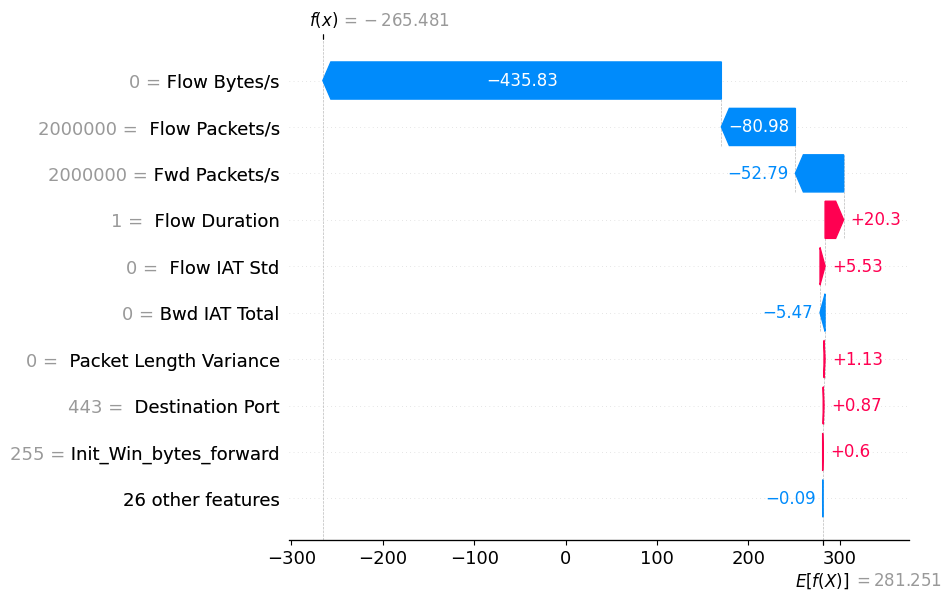

In [18]:
shap.plots.waterfall(shap_values[0], max_display=10)

# Force Plot:

In [23]:
shap.plots.force(shap_values[0])

# Mean SHAP Plot:

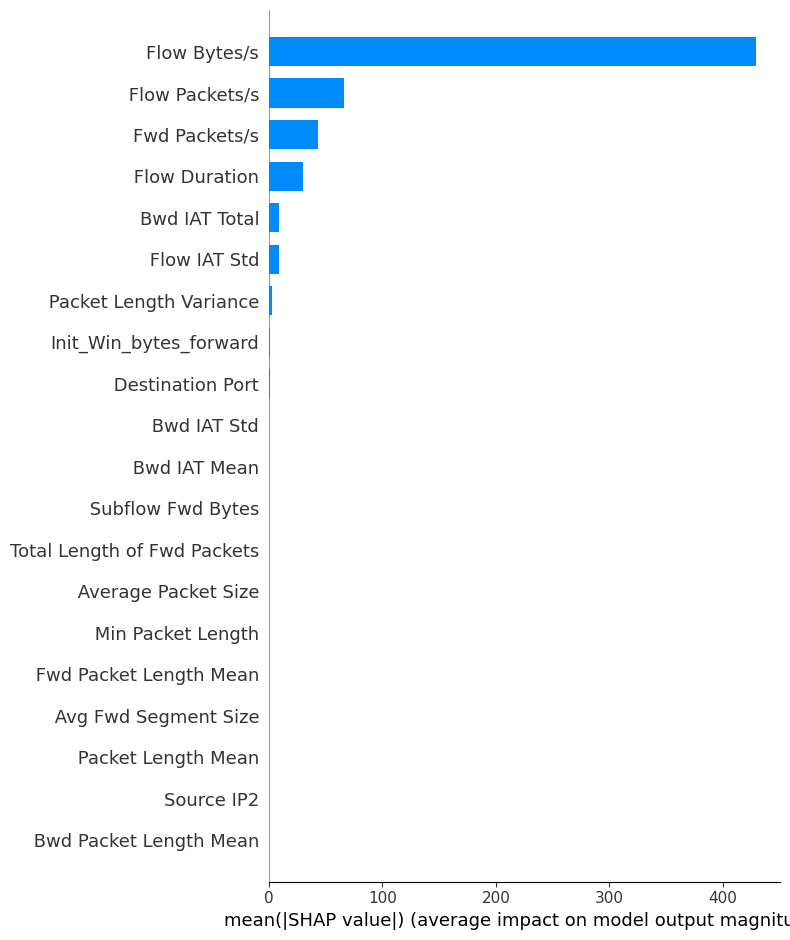

In [20]:
shap.summary_plot(shap_values, X_test, plot_type="bar")


# Beeswarm Plot:

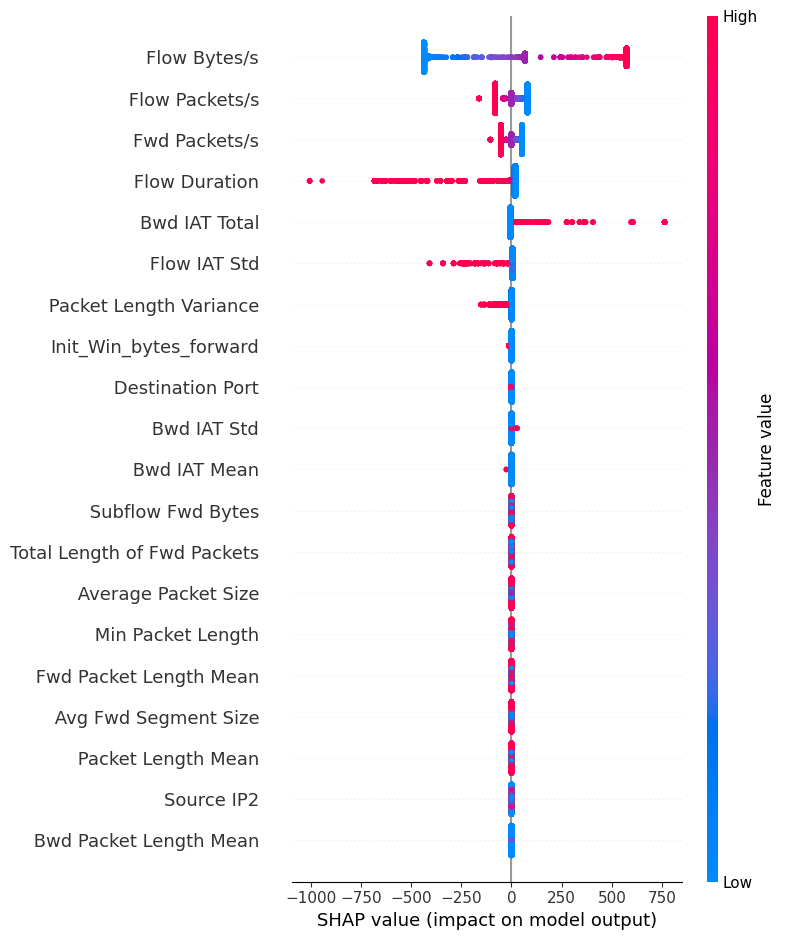

In [25]:
shap.summary_plot(shap_values, X_test)